In [3]:
import scipy.io as sci
import numpy as np
import glob
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import pylab
import hddm
from functions import *

C:\Users\Edwin\miniconda3\envs\hddm\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


# Data Format

In [4]:
datapath = 'ExpData/*.mat'
datafiles = np.array(glob.glob(datapath))

In [5]:
flashdata = np.empty((1,5))
beepdata = np.empty((1,5))
for i in np.arange(0, len(datafiles)):
    mat = sci.loadmat(datafiles[i])
    matf = np.insert(mat['mixtrF'], 0, int(i + 1), axis=1)
    accf = np.hstack((matf, mat['accMatF'], mat['resptimeF']))
    matb = np.insert(mat['mixtrB'], 0, int(i + 1), axis=1)
    accb = np.hstack((matb, mat['accMatB'], mat['resptimeB']))
    flashdata = np.vstack((flashdata, accf))
    beepdata = np.vstack((beepdata, accb))
    
flashdata = flashdata[1:]
beepdata = beepdata[1:]

In [6]:
flashframe = pd.DataFrame(flashdata, columns=['subj_idx', 'flashpres', 'beeppres', 'acc', 'rt'])
beepframe = pd.DataFrame(beepdata, columns=['subj_idx', 'flashpres', 'beeppres', 'acc', 'rt'])

congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

In [7]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Flash RT distributions (2 flashes)')
for i, subj_data in unif.loc[unif['flashpres'] == 2].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Flash RT distributions (2 flashes)')
for i, subj_data in congrf.loc[congrf['flashpres'] == 2].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

plt.close()

In [8]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Flash RT distributions (3 flashes)')
for i, subj_data in unif.loc[unif['flashpres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 30])
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Flash RT distributions (3 flashes)')
for i, subj_data in congrf.loc[congrf['flashpres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 30])
plt.close()

In [9]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Beep RT distributions (2 beeps)')
#for i, subj_data in unif.loc[unif['flashpres'] == 2].groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unib.loc[unib['beeppres'] == 2].rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 200])
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Beep RT distributions (2 beeps)')
#for i, subj_data in congrf.loc[congrf['flashpres'] == 2].groupby('subj_idx'):
#    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
unib.loc[unib['beeppres'] == 3].rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 200])
plt.close()

In [10]:
uni2flashacc = sum(unif.loc[unif['flashpres'] == 2]['acc']) / len(unif.loc[unif['flashpres'] == 2])
uni3flashacc = sum(unif.loc[unif['flashpres'] == 3]['acc']) / len(unif.loc[unif['flashpres'] == 3])
congr2flashacc = sum(congrf.loc[congrf['flashpres'] == 2]['acc']) / len(congrf.loc[congrf['flashpres'] == 2])
congr3flashacc = sum(congrf.loc[congrf['flashpres'] == 3]['acc']) / len(congrf.loc[congrf['flashpres'] == 3])

fig = plt.figure(figsize = (14, 5))
ax = fig.add_subplot(121, xlabel='condition', ylabel='% accurate', title='Accuracy for Unisensory Flash Trials')
objects = ('Unisensory 2 Flash',  'Unisensory 3 Flash')
y_pos = np.arange(len(objects))
performance = [uni2flashacc, uni3flashacc]

uni2flashaccstd = calcstderr(unif.loc[unif['flashpres'] == 2], 'acc')
uni3flashaccstd = calcstderr(unif.loc[unif['flashpres'] == 3], 'acc')
congr2flashaccstd = calcstderr(congrf.loc[congrf['flashpres'] == 2], 'acc')
congr3flashaccstd = calcstderr(congrf.loc[congrf['flashpres'] == 3], 'acc')

plt.bar(y_pos, performance, yerr=[uni2flashaccstd, uni3flashaccstd], 
        color=['#1f77b4', '#ff7f0e'], ecolor='black', capsize=10)

plt.xticks(y_pos, objects)
plt.ylim([0,1])

ax = fig.add_subplot(122, xlabel='condition', ylabel='% accurate', title='Accuracy for Congruent Flash Trials')
objects2 = ('Congruent 2 Flash', 'Congruent 3 Flash')
y_pos2 = np.arange(len(objects2))
performance2 = [congr2flashacc, congr3flashacc]
plt.bar(y_pos2, performance2, yerr=[congr2flashaccstd, congr3flashaccstd], 
        color=['#1f77b4', '#ff7f0e'], ecolor='black', capsize=10)
plt.xticks(y_pos2, objects2)
plt.ylim([0,1])

plt.close()

In [11]:
fig = plt.figure(figsize=(14, 5))
ax = fig.add_subplot(121, xlabel='RT', ylabel='count', title='Unisensory Beep RT distributions (3 flashes)')
for i, subj_data in unib.loc[unib['beeppres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 70])
    
ax = fig.add_subplot(122, xlabel='RT', ylabel='count', title='Congruent Beep RT distributions (3 flashes)')
for i, subj_data in congrb.loc[congrb['beeppres'] == 3].groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
ax.set_ylim([0, 70])
plt.close()

In [12]:
uni2beepacc = sum(unib.loc[unib['beeppres'] == 2]['acc']) / len(unib.loc[unib['beeppres'] == 2])
uni3beepacc = sum(unib.loc[unib['beeppres'] == 3]['acc']) / len(unib.loc[unib['beeppres'] == 3])
congr2beepacc = sum(congrb.loc[congrb['beeppres'] == 2]['acc']) / len(congrb.loc[congrb['beeppres'] == 2])
congr3beepacc = sum(congrb.loc[congrb['beeppres'] == 3]['acc']) / len(congrb.loc[congrb['beeppres'] == 3])

fig = plt.figure(figsize = (14, 5))
ax = fig.add_subplot(121, xlabel='condition', ylabel='% accurate', title='Accuracy for Unisensory Beep Trials')
objects = ('Unisensory 2 Beep',  'Unisensory 3 Beep')
y_pos = np.arange(len(objects))
performance = [uni2beepacc, uni3beepacc]

uni2beepaccstd = calcstderr(unib.loc[unib['beeppres'] == 2], 'acc')
uni3beepaccstd = calcstderr(unib.loc[unib['beeppres'] == 3], 'acc')
congr2beepaccstd = calcstderr(congrb.loc[congrb['beeppres'] == 2], 'acc')
congr3beepaccstd = calcstderr(congrb.loc[congrb['beeppres'] == 3], 'acc')

plt.bar(y_pos, performance, yerr=[uni2beepaccstd, uni3beepaccstd], 
        color=['#1f77b4', '#ff7f0e'], ecolor='black', capsize=10)

plt.xticks(y_pos, objects)
plt.ylim([0,1])

ax = fig.add_subplot(122, xlabel='condition', ylabel='% accurate', title='Accuracy for Congruent Beep Trials')
objects2 = ('Congruent 2 Beep', 'Congruent 3 Beep')
y_pos2 = np.arange(len(objects2))
performance2 = [congr2beepacc, congr3beepacc]
plt.bar(y_pos2, performance2, yerr=[congr2beepaccstd, congr3beepaccstd], 
        color=['#1f77b4', '#ff7f0e'], ecolor='black', capsize=10)
plt.xticks(y_pos2, objects2)
plt.ylim([0,1])

plt.close()

# Plots

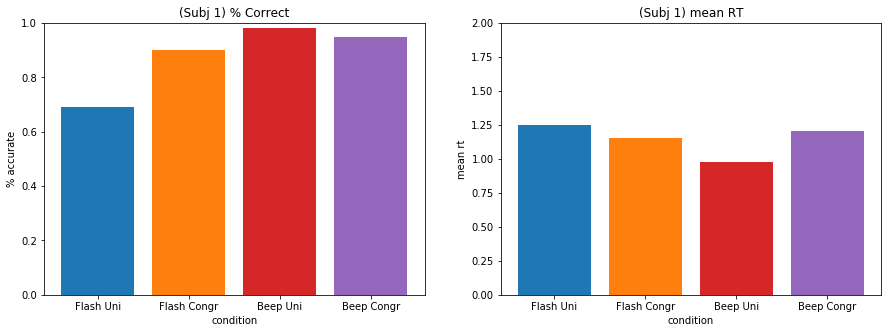

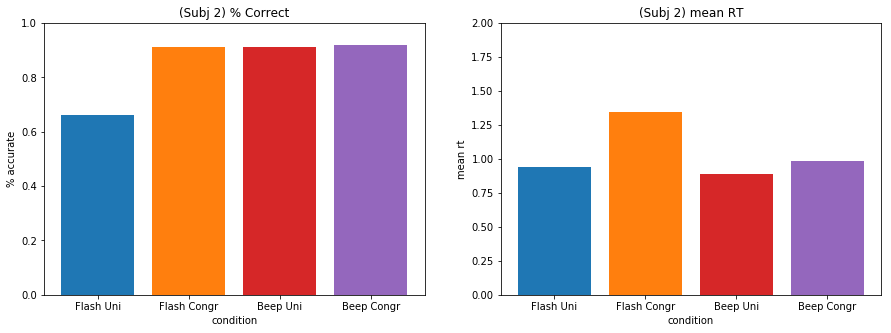

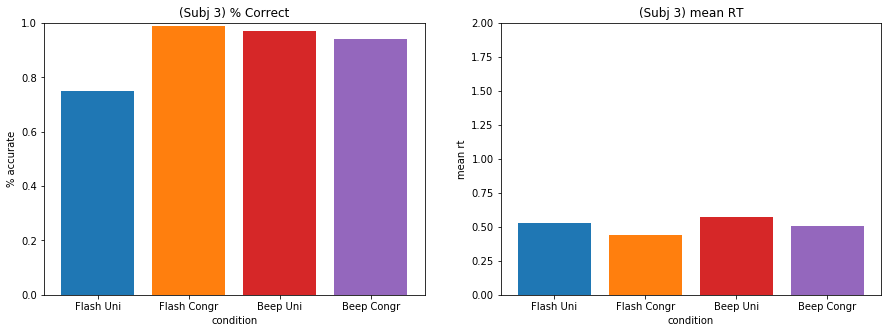

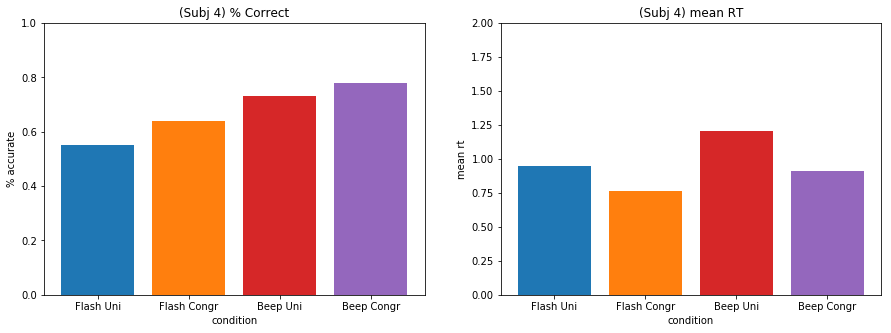

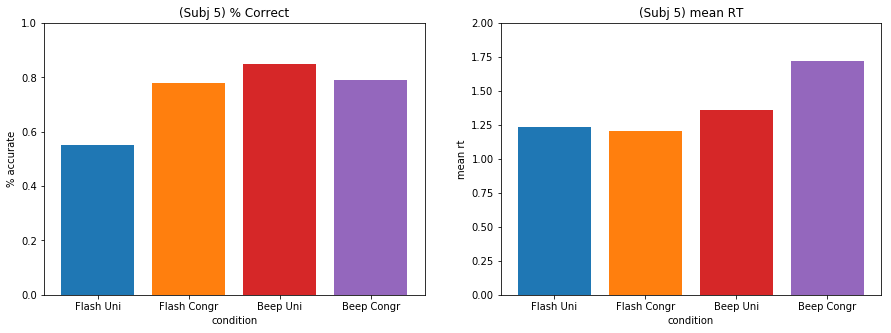

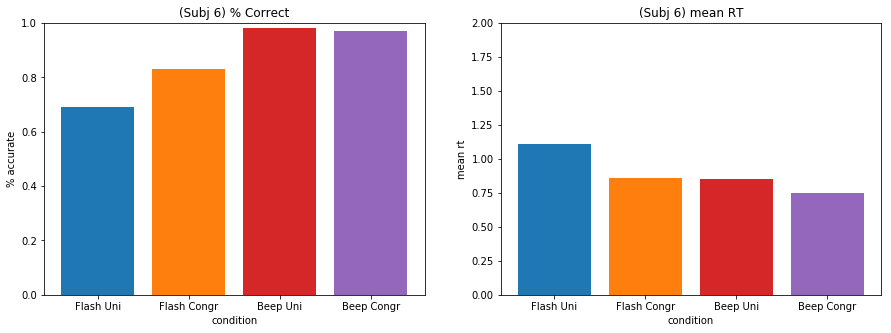

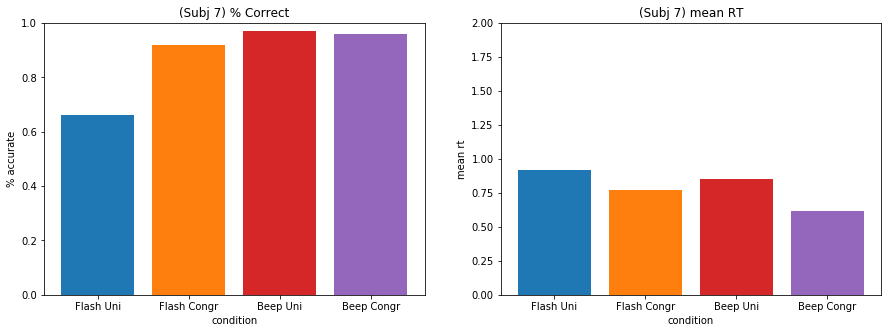

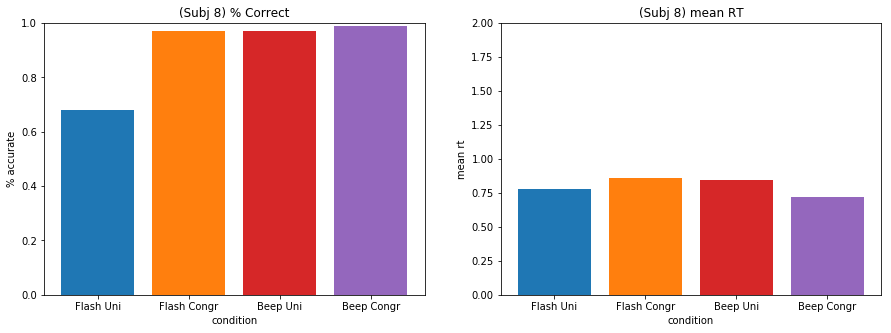

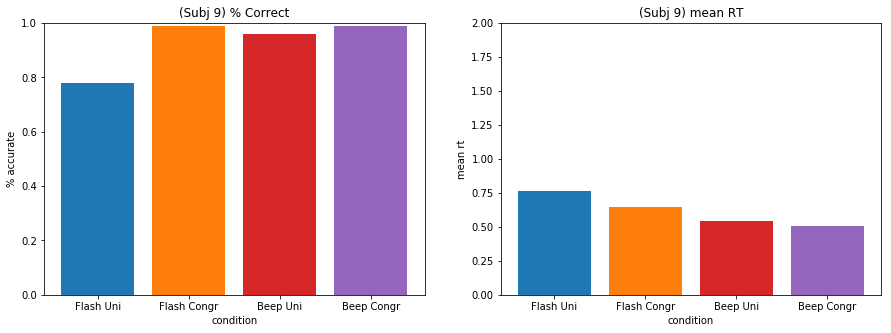

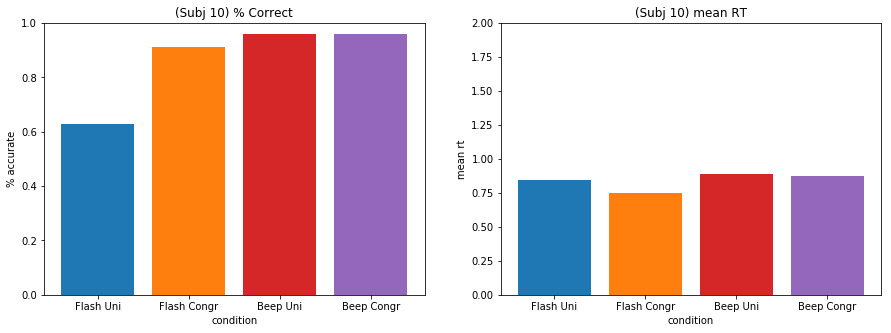

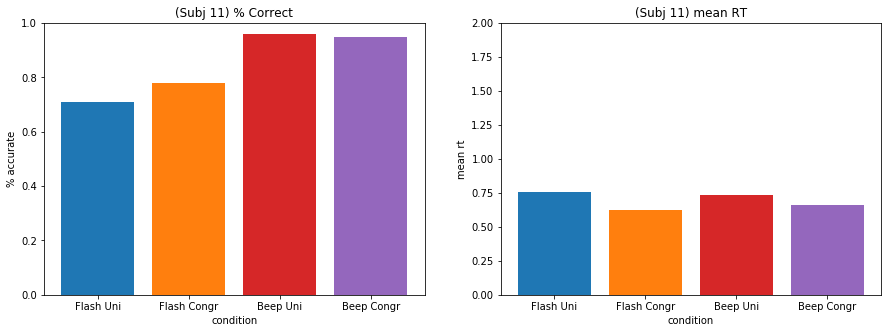

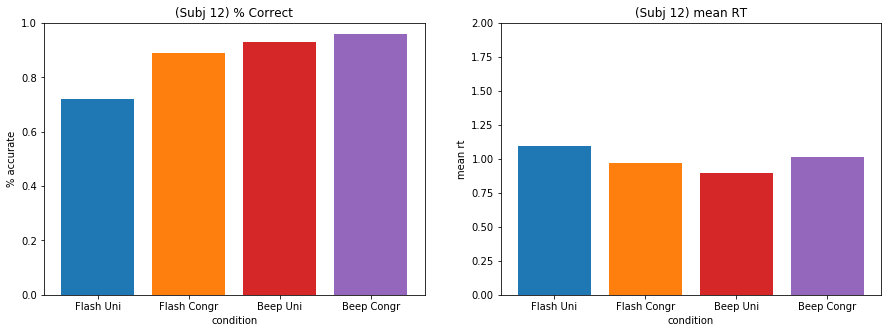

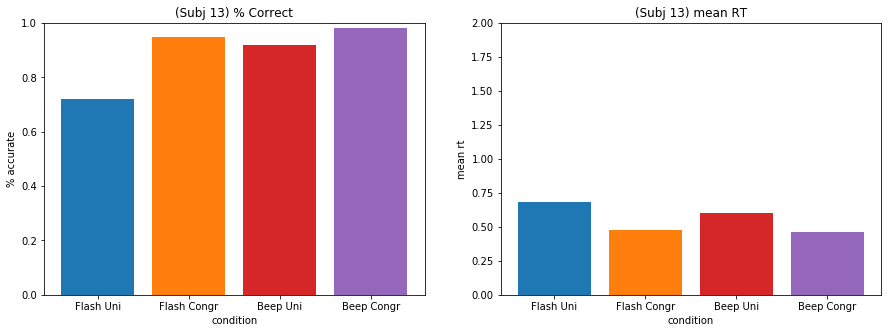

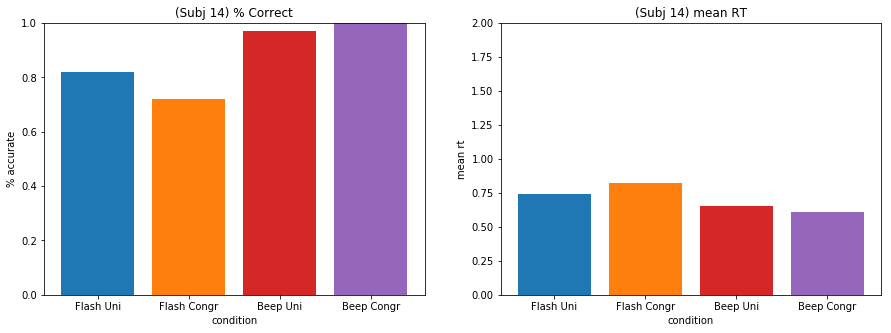

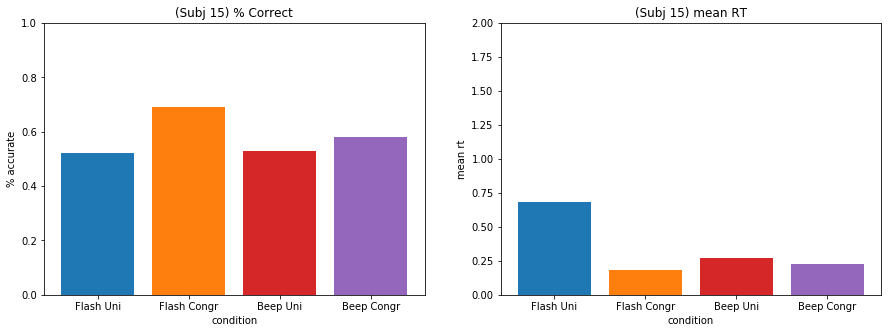

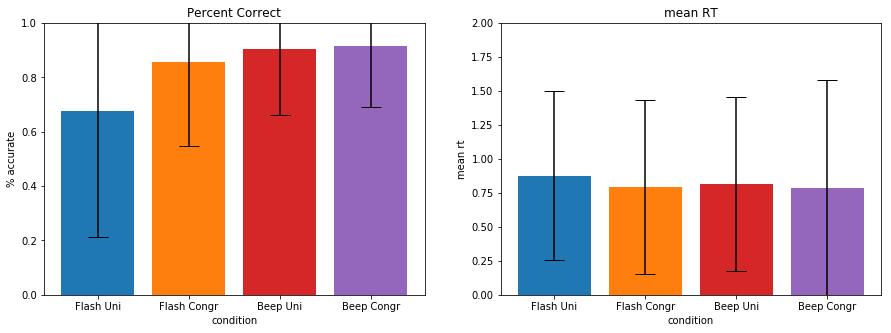

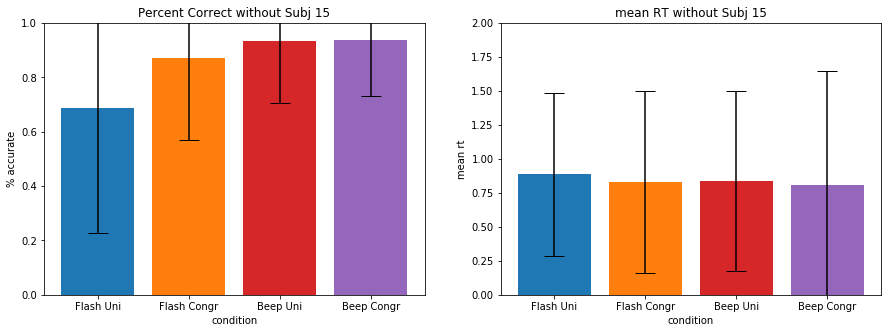

In [13]:
for i in np.arange(max(unif['subj_idx'])):
    plotbars(unif, unib, congrf, congrb, "(Subj " + str(int(i + 1)) + ") % Correct", 
             "(Subj " + str(int(i + 1)) + ") mean RT", int(i + 1))

plotbars(unif, unib, congrf, congrb, "Percent Correct", "mean RT")
plotbars(unif.loc[unif['subj_idx'] != 15], unib.loc[unib['subj_idx'] != 15], 
         congrf.loc[congrf['subj_idx'] != 15], congrb.loc[congrb['subj_idx'] != 15],
        "Percent Correct without Subj 15", "mean RT without Subj 15")

In [14]:
subject = 15

flashframe = droprow(flashframe, 0.05)
flashframe = dropsubj(flashframe, subject)
flashframe = droprow(flashframe, 10, False)
beepframe = droprow(beepframe, 0.05)
beepframe = dropsubj(beepframe, subject)
beepframe = droprow(beepframe, 10, False)

congrf = flashframe.loc[flashframe['flashpres'] == flashframe['beeppres']]
unif = flashframe.loc[flashframe['beeppres'] == 0]
congrb = beepframe.loc[beepframe['flashpres'] == beepframe['beeppres']]
unib = beepframe.loc[beepframe['flashpres'] == 0]

# Pairwise t-tests

Conduct t-test between accuracy or rt across all subjects (1400 pairs in each test, 100 from each subject)

## Comparing accuracy for flash trials (unisensory vs. bisensory)

In [15]:
print("pvalue: " + str(stats.ttest_rel(unif["acc"][1:], congrf["acc"])[1]))

pvalue: 7.545208303580591e-33


## Comparing accuracy for beep trials (unisensory vs. bisensory)

In [16]:
print("pvalue: " + str(stats.ttest_rel(unib["acc"][3:], congrb["acc"])[1]))

pvalue: 0.4641157028835692


## Comparing rt for flash trials (unisensory vs. bisensory)

In [17]:
print("pvalue: " + str(stats.ttest_rel(unif["rt"][1:], congrf["rt"])[1]))

pvalue: 0.9112509628115936


## Comparing rt for beep trials (unisensory vs. bisensory)

In [18]:
print("pvalue: " + str(stats.ttest_rel(unib["rt"][3:], congrb["rt"])[1]))

pvalue: 0.08822721470776992


# HDDM

In [19]:
alldata = pd.concat([flashframe, beepframe])
alldata.columns = ['subj_idx', 'flashpres', 'beeppres', 'response', 'rt']
conditions = [(alldata['flashpres'] == 0) & (alldata['beeppres'] == 2), 
              (alldata['flashpres'] == 0) & (alldata['beeppres'] == 3),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 0),
              (alldata['flashpres'] == 2) & (alldata['beeppres'] == 2),
              (alldata['flashpres'] == 3) & (alldata['beeppres'] == 3),]
choices = ['A2', 'A3', 'V2', 'V3', 'A2V2', 'A3V3']
alldata['stimName'] = np.select(conditions, choices)

In [20]:
model_unif = formatmodeldata(unif, [(unif['flashpres'] == 2), (unif['flashpres'] == 3)], ['F2', 'F3'])
model_unib = formatmodeldata(unib, [(unib['beeppres'] == 2), (unib['beeppres'] == 3)], ['B2', 'B3'])
model_congrf = formatmodeldata(congrf, [(congrf['flashpres'] == 2) & (congrf['beeppres'] == 2),
                                        (congrf['flashpres'] == 3) & (congrf['beeppres'] == 3)], ['F2B2', 'F3B3'])
model_congrb = formatmodeldata(congrb, [(congrb['flashpres'] == 2) & (congrb['beeppres'] == 2),
                                        (congrb['flashpres'] == 3) & (congrb['beeppres'] == 3)], ['F2B2', 'F3B3'])

In [21]:
model_unif['type'] = 'u'
model_congrf['type'] = 'c'
model_f = pd.concat([model_unif, model_congrf], axis = 0)
model_unib['type'] = 'u'
model_congrb['type'] = 'c'
model_b = pd.concat([model_unib, model_congrb], axis = 0)

In [22]:
flashdata = np.empty((1,6))
beepdata = np.empty((1,6))
for i in np.arange(0, len(datafiles)):
    mat = sci.loadmat(datafiles[i])
    matf = np.insert(mat['mixtrF'], 0, int(i + 1), axis=1)
    accf = np.hstack((matf, mat['respMatF'], mat['accMatF'], mat['resptimeF']))
    matb = np.insert(mat['mixtrB'], 0, int(i + 1), axis=1)
    accb = np.hstack((matb, mat['respMatB'], mat['accMatB'], mat['resptimeB']))
    flashdata = np.vstack((flashdata, accf))
    beepdata = np.vstack((beepdata, accb))
    
flashdata = flashdata[1:]
beepdata = beepdata[1:]

stimFdata = pd.DataFrame(flashdata, columns=['subj_idx', 'flashpres', 'beeppres', 'response', 'acc', 'rt'])
stimBdata = pd.DataFrame(beepdata, columns=['subj_idx', 'flashpres', 'beeppres', 'response', 'acc', 'rt'])

In [23]:
stimFdata.loc[stimFdata['response'] == 90, 'response'] = 0
stimFdata.loc[stimFdata['response'] == 91, 'response'] = 1
stimBdata.loc[stimBdata['response'] == 90, 'response'] = 0
stimBdata.loc[stimBdata['response'] == 91, 'response'] = 1

congrfstim = stimFdata.loc[stimFdata['flashpres'] == stimFdata['beeppres']]
unifstim = stimFdata.loc[stimFdata['beeppres'] == 0]
congrbstim = stimBdata.loc[stimBdata['flashpres'] == stimBdata['beeppres']]
unibstim = stimBdata.loc[stimBdata['flashpres'] == 0]

congrfstim = congrfstim.assign(trialtype = 'c')
#df1.loc[:,'f'] = pd.Series(np.random.randn(sLength), index=df1.index) = 'c'
unifstim = unifstim.assign(trialtype = 'u')
congrbstim = congrbstim.assign(trialtype = 'c')
unibstim = unibstim.assign(trialtype = 'u')


In [24]:
# 0 means responded 2, 1 means responded 3
def stimcode(df, conditions, choices):
    dframe = df.copy()
    dframe['stimCode'] = np.select(conditions, choices)
    return(dframe)

unifstim = stimcode(unifstim, [(unifstim['response'] == 0) & (unifstim['acc'] == 0), 
                                  (unifstim['response'] == 0) & (unifstim['acc'] == 1),
                                  (unifstim['response'] == 1) & (unifstim['acc'] == 0),
                                  (unifstim['response'] == 1) & (unifstim['acc'] == 1)], [1, 0, 0, 1])
congrfstim = stimcode(congrfstim, [(congrfstim['response'] == 0) & (congrfstim['acc'] == 0), 
                                      (congrfstim['response'] == 0) & (congrfstim['acc'] == 1),
                                      (congrfstim['response'] == 1) & (congrfstim['acc'] == 0),
                                      (congrfstim['response'] == 1) & (congrfstim['acc'] == 1)], [1, 0, 0, 1])
unibstim = stimcode(unibstim, [(unibstim['response'] == 0) & (unibstim['acc'] == 0), 
                                  (unibstim['response'] == 0) & (unibstim['acc'] == 1),
                                  (unibstim['response'] == 1) & (unibstim['acc'] == 0),
                                  (unibstim['response'] == 1) & (unibstim['acc'] == 1)], [1, 0, 0, 1])
congrbstim = stimcode(congrbstim, [(congrbstim['response'] == 0) & (congrbstim['acc'] == 0), 
                                      (congrbstim['response'] == 0) & (congrbstim['acc'] == 1),
                                      (congrbstim['response'] == 1) & (congrbstim['acc'] == 0),
                                      (congrbstim['response'] == 1) & (congrbstim['acc'] == 1)], [1, 0, 0, 1])

In [25]:
stim_f = pd.concat([unifstim, congrfstim], axis = 0)
stim_b = pd.concat([unibstim, congrbstim], axis = 0)
stim_f = stim_f.drop(stim_f[stim_f['subj_idx'] == 15].index)
stim_b = stim_b.drop(stim_b[stim_b['subj_idx'] == 15].index)

## Accuracy-coded flash model (same threshold)

In [64]:
flash_acc = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type'], 't': ['type']})
flash_acc.sample(7000, burn=500)

 [-----------------100%-----------------] 7001 of 7000 complete in 706.6 sec

In [236]:
#flash_acc.print_stats()
#unif_acc.plot_posteriors()

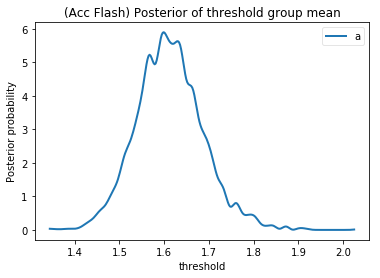

In [123]:
a = flash_acc.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Acc Flash) Posterior of threshold group mean')
plt.show()

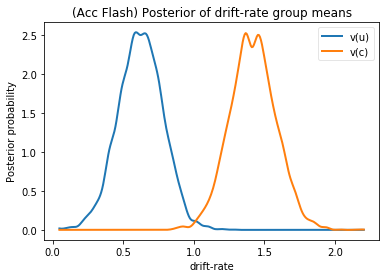

In [124]:
v_u, v_c = flash_acc.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Acc Flash) Posterior of drift-rate group means')
plt.show()

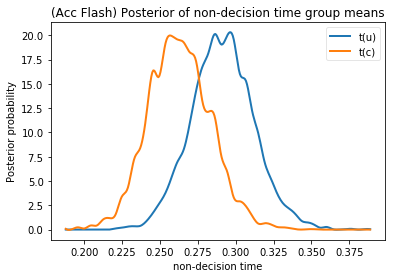

In [125]:
t_u, t_c = flash_acc.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Acc Flash) Posterior of non-decision time group means')
plt.show()

## Stimulus-coded flash models(same threshold)

In [103]:
stim_f.head()

,subj_idx,flashpres,beeppres,response,acc,rt,trialtype,stimCode
2,1.0,3.0,0.0,1.0,1.0,1.341606,u,1
5,1.0,3.0,0.0,1.0,1.0,1.967426,u,1
7,1.0,3.0,0.0,1.0,1.0,0.869609,u,1
10,1.0,3.0,0.0,1.0,1.0,1.167405,u,1
12,1.0,3.0,0.0,1.0,1.0,1.050508,u,1


In [105]:
flash_stim = hddm.HDDMStimCoding(stim_f, include=['z', 'p_outlier'], depends_on={'v': 'trialtype', 't': 'trialtype', 'z': 'trialtype'}, stim_col='stimCode', split_param = 'v')
flash_stim.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 737.6 sec

In [106]:
flash_stim.print_stats()

                    mean       std      2.5q       25q       50q       75q     97.5q    mc err
a               1.688173  0.090209  1.518996  1.628076  1.685912  1.745305  1.873517  0.001424
a_std           0.320984  0.078078  0.208485  0.267290  0.308171  0.360211  0.513353  0.001404
a_subj.1.0      2.116047  0.103532  1.916446  2.045809  2.115322  2.183706  2.322991  0.002686
a_subj.2.0      1.963731  0.081954  1.806676  1.907435  1.962928  2.017503  2.126271  0.001501
a_subj.3.0      1.357182  0.063656  1.239403  1.313666  1.354651  1.397695  1.487782  0.001426
a_subj.4.0      1.685749  0.080782  1.525618  1.631575  1.685617  1.739361  1.843995  0.002249
a_subj.5.0      2.011753  0.097745  1.822844  1.945445  2.010048  2.075581  2.208777  0.002035
a_subj.6.0      1.926913  0.083861  1.765811  1.869259  1.925349  1.983870  2.100920  0.001458
a_subj.7.0      1.802831  0.086390  1.645952  1.742949  1.798717  1.860178  1.979398  0.002214
a_subj.8.0      1.665693  0.082975  1.510569  1.60

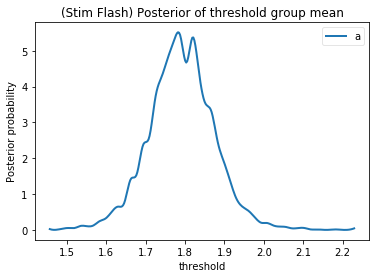

In [88]:
a = flash_stim.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Stim Flash) Posterior of threshold group mean')
plt.show()

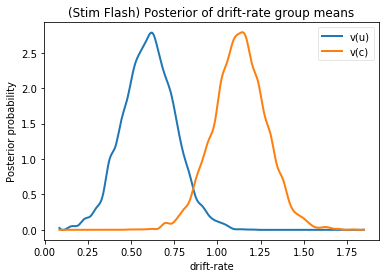

In [89]:
v_u, v_c = flash_stim.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Stim Flash) Posterior of drift-rate group means')
plt.show()

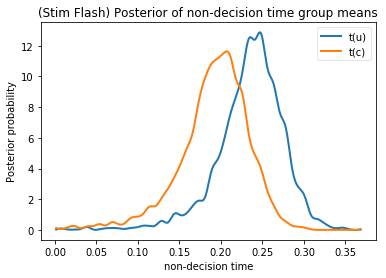

In [90]:
t_u, t_c = flash_stim.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Stim Flash) Posterior of non-decision time group means')
plt.show()

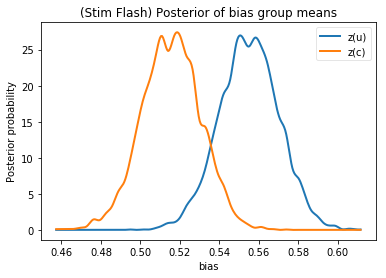

In [91]:
z_u, z_c = flash_stim.nodes_db.node[['z(u)', 'z(c)']]
hddm.analyze.plot_posterior_nodes([z_u, z_c])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('(Stim Flash) Posterior of bias group means')
plt.show()

## Posterior Predictive Check (Flash)

### Accuracy-coded Flash

In [93]:
fppc = hddm.utils.post_pred_gen(flash_acc)

 [-------------------110%-------------------] 31 of 28 complete in 1290.7 sec

In [98]:
fppc_compare = hddm.utils.post_pred_stats(model_f, fppc)
print(fppc_compare)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.778135  0.795677  0.124663  0.000308  0.015849     True   
mean_ub   0.855433  0.820834  0.211357  0.001197  0.045869     True   
std_ub    0.665953  0.420534  0.161049  0.060231  0.086168     True   
10q_ub    0.389500  0.435356  0.093755  0.002103  0.010893     True   
30q_ub    0.537021  0.554826  0.126206  0.000317  0.016245     True   
50q_ub    0.665879  0.697958  0.171988  0.001029  0.030609     True   
70q_ub    0.849032  0.911364  0.245902  0.003885  0.064353     True   
90q_ub    1.449996  1.359270  0.413300  0.008231  0.179048     True   
mean_lb  -1.085988 -0.823607  0.234260  0.068844  0.123721     True   
std_lb    0.903215  0.388901  0.200062  0.264519  0.304544    False   
10q_lb    0.444976  0.465511  0.110517  0.000422  0.012636     True   
30q_lb    0.630831  0.577676  0.144925  0.002825  0.023829     True   
50q_lb

### Stimulus-coded Flash

In [52]:
fppc2 = hddm.utils.post_pred_gen(flash_stim)

 [------------------105%------------------] 59 of 56 complete in 2478.1 sec

In [55]:
fppc_compare2 = hddm.utils.post_pred_stats(stim_f, fppc2)
print(fppc_compare2)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.778135  0.786028  0.128655  0.000062  0.016614     True   
mean_ub   0.855433  0.920047  0.269142  0.004175  0.076612     True   
std_ub    0.665953  0.523266  0.216317  0.020360  0.067152     True   
10q_ub    0.389500  0.440812  0.129023  0.002633  0.019280     True   
30q_ub    0.537021  0.588942  0.171498  0.002696  0.032107     True   
50q_ub    0.665879  0.767402  0.229415  0.010307  0.062938     True   
70q_ub    0.849032  1.032765  0.323504  0.033758  0.138412     True   
90q_ub    1.449996  1.576562  0.532017  0.016019  0.299061     True   
mean_lb  -1.085988 -0.926923  0.325185  0.025302  0.131047     True   
std_lb    0.903215  0.453136  0.279067  0.202571  0.280450     True   
10q_lb    0.444976  0.514913  0.209170  0.004891  0.048643     True   
30q_lb    0.630831  0.646152  0.243953  0.000235  0.059748     True   
50q_lb

## Parameter Recovery (Flash)

### Accuracy-coded Flash

In [68]:
fsyndata, fparam = hddm.generate.gen_rand_data(params={'u': {'a': 1.613684  , 'v': 0.631853, 't': 0.291248},
                                                       'c': {'a': 1.613684  , 'v': 1.411966, 't': 0.263438}}, 
                                               size = 200, subjs = 14)

In [69]:
print(pd.DataFrame(data = fparam['u']).mean())
print(pd.DataFrame(data = fparam['c']).mean())

a    1.568907
t    0.304491
v    0.682463
dtype: float64
a    1.568907
t    0.276681
v    1.462576
dtype: float64


In [73]:
print(np.mean(fsyndata['response']))
print(np.mean(model_f['response']))

0.8232142857142857
0.7781350482315113


In [234]:
fparamrec = hddm.HDDM(fsyndata, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition'})
fparamrec.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 865.2 sec

In [243]:
#fparamrec.print_stats()

a: 0.2% diff

v(c): 1.6% diff

v(u): 0.6% diff

t(c): 6.3% diff

t(u): 5.7% diff

### Stim-coded Flash

In [38]:
np.mean(stim_f.loc[stim_f['trialtype'] == 'c']['stimCode'])

0.4992857142857143

In [35]:
stim_f.head()

,subj_idx,flashpres,beeppres,response,acc,rt,trialtype,stimCode
2,1.0,3.0,0.0,1.0,1.0,1.341606,u,1
5,1.0,3.0,0.0,1.0,1.0,1.967426,u,1
7,1.0,3.0,0.0,1.0,1.0,0.869609,u,1
10,1.0,3.0,0.0,1.0,1.0,1.167405,u,1
12,1.0,3.0,0.0,1.0,1.0,1.050508,u,1


In [115]:
b1, b1param = hddm.generate.gen_rand_data(params={'u': {'a': 1.688173, 'v': 0.653901, 't': 0.309421, 'z': 0.426777},
                                                  'c': {'a': 1.688173, 'v': 1.448321, 't': 0.266443, 'z': 0.511692}}, 
                                               size = 50, subjs = 14)
b2, b2param = hddm.generate.gen_rand_data(params={'u': {'a': 1.688173, 'v': 0.653901, 't': 0.309421, 'z': 1 - 0.426777},
                                                  'c': {'a': 1.688173, 'v': 1.448321, 't': 0.266443, 'z': 1 - 0.511692}}, 
                                               size = 50, subjs = 14)
b1['stimCode'] = 1
b2['stimCode'] = 0
fsyndata2 = b1.append(b2, ignore_index = True)

In [112]:
print(pd.DataFrame(data = b2param['u']).mean())
print(pd.DataFrame(data = b2param['c']).mean())

a    1.724963
t    0.326790
v    0.637858
z    0.586321
dtype: float64
a    1.724963
t    0.283812
v    1.432278
z    0.501406
dtype: float64


In [116]:
fsyndata2.mean()

rt          0.856694
response    0.838214
subj_idx    6.500000
stimCode    0.500000
dtype: float64

In [117]:
stim_f[['rt', 'response', 'stimCode']].mean()

rt          0.906268
response    0.424643
stimCode    0.499643
dtype: float64

1, 0

In [119]:
flash_stim = hddm.HDDMStimCoding(fsyndata2, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimCode', split_param = 'v')
flash_stim.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 747.4 sec

In [120]:
fparamrec2.print_stats()

                   mean        std       2.5q        25q        50q        75q      97.5q       mc err
a               1.79311  0.0302552     1.7365    1.77359    1.79268    1.81128    1.85622  0.000663417
a_std         0.0826726  0.0332444  0.0254655  0.0599159  0.0800215    0.10189   0.155982   0.00139232
a_subj.0        1.79325  0.0457346    1.70502     1.7638    1.79172     1.8225    1.88599  0.000773769
a_subj.1        1.84057  0.0554221    1.74117    1.80229    1.83642    1.87612    1.96092    0.0013297
a_subj.2        1.75161  0.0532709    1.64514    1.71669    1.75174    1.78791    1.85665   0.00120503
a_subj.3        1.78092  0.0491442    1.68589    1.74828    1.78043    1.81249    1.88119  0.000958153
a_subj.4        1.87734   0.070667    1.75941    1.82565    1.87149    1.92168    2.02991   0.00206717
a_subj.5        1.78183    0.05062    1.68263    1.74901     1.7813    1.81494    1.88225  0.000961894
a_subj.6        1.73828  0.0537091    1.63183    1.70232    1.73933    1.

a: 2.4% diff

v(c): 0.4% diff

v(u): 6.7% diff

t(c): 14% diff

t(u): 9.8% diff

z(c): 7.3% diff

z(u): 5.7% diff

0, 1

In [121]:
b1, b1param = hddm.generate.gen_rand_data(params={'u': {'a': 1.688173, 'v': 0.653901, 't': 0.309421, 'z': 0.426777},
                                                  'c': {'a': 1.688173, 'v': 1.448321, 't': 0.266443, 'z': 0.511692}}, 
                                               size = 50, subjs = 14)
b2, b2param = hddm.generate.gen_rand_data(params={'u': {'a': 1.688173, 'v': 0.653901, 't': 0.309421, 'z': 1 - 0.426777},
                                                  'c': {'a': 1.688173, 'v': 1.448321, 't': 0.266443, 'z': 1 - 0.511692}}, 
                                               size = 50, subjs = 14)
b1['stimCode'] = 0
b2['stimCode'] = 1
fsyndata2 = b1.append(b2, ignore_index = True)

In [122]:
bparamrec2 = hddm.HDDMStimCoding(bsyndata2, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimCode', split_param='v')
bparamrec2.sample(7000, burn=500)
fparamrec2.print_stats()

 [-----------------100%-----------------] 7000 of 7000 complete in 765.9 sec                   mean        std       2.5q        25q        50q        75q      97.5q       mc err
a               1.79311  0.0302552     1.7365    1.77359    1.79268    1.81128    1.85622  0.000663417
a_std         0.0826726  0.0332444  0.0254655  0.0599159  0.0800215    0.10189   0.155982   0.00139232
a_subj.0        1.79325  0.0457346    1.70502     1.7638    1.79172     1.8225    1.88599  0.000773769
a_subj.1        1.84057  0.0554221    1.74117    1.80229    1.83642    1.87612    1.96092    0.0013297
a_subj.2        1.75161  0.0532709    1.64514    1.71669    1.75174    1.78791    1.85665   0.00120503
a_subj.3        1.78092  0.0491442    1.68589    1.74828    1.78043    1.81249    1.88119  0.000958153
a_subj.4        1.87734   0.070667    1.75941    1.82565    1.87149    1.92168    2.02991   0.00206717
a_subj.5        1.78183    0.05062    1.68263    1.74901     1.7813    1.81494    1.88225  0.0009618

## Accuracy-coded beep model (same threshold)

In [26]:
beep_acc = hddm.HDDM(model_b, include=['p_outlier'], depends_on={'v': ['type'], 't': ['type']})
beep_acc.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 446.6 sec

In [27]:
beep_acc.print_stats()
#unif_acc.plot_posteriors()

                    mean       std      2.5q       25q       50q       75q     97.5q    mc err
a               2.331091  0.133770  2.091850  2.241198  2.322164  2.411720  2.621062  0.005894
a_std           0.377992  0.118903  0.201023  0.295142  0.359520  0.440911  0.660586  0.005481
a_subj.1.0      2.811820  0.217045  2.432069  2.656176  2.792620  2.951234  3.275456  0.009656
a_subj.2.0      2.047333  0.110209  1.847267  1.968978  2.042503  2.118981  2.279434  0.002621
a_subj.3.0      2.165646  0.242449  1.734900  1.992797  2.148609  2.323178  2.668886  0.012238
a_subj.4.0      1.929467  0.083723  1.773113  1.871842  1.926840  1.984744  2.102359  0.001962
a_subj.5.0      2.329502  0.093172  2.149783  2.265726  2.327588  2.391774  2.514094  0.001921
a_subj.6.0      2.765281  0.262588  2.294929  2.584682  2.752829  2.929792  3.319848  0.013766
a_subj.7.0      2.454822  0.181035  2.132914  2.329948  2.444015  2.563334  2.853196  0.006786
a_subj.8.0      2.560988  0.236886  2.147677  2.38

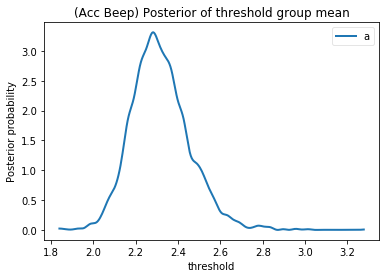

In [140]:
a = beep_acc.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Acc Beep) Posterior of threshold group mean')
plt.show()

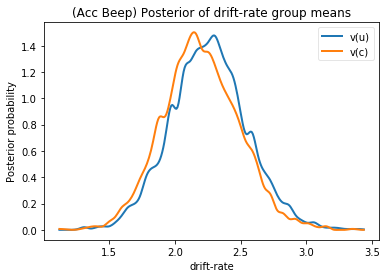

In [141]:
v_u, v_c = beep_acc.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Acc Beep) Posterior of drift-rate group means')
plt.show()

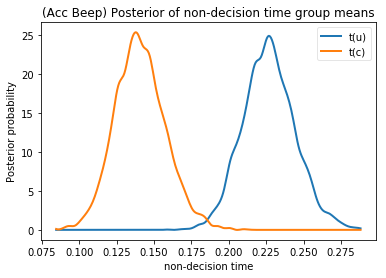

In [142]:
t_u, t_c = beep_acc.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Acc Beep) Posterior of non-decision time group means')
plt.show()

## Stim-coded beep model (same threshold)

In [42]:
stim_b.head()

,subj_idx,flashpres,beeppres,response,acc,rt,trialtype,stimCode
0,1.0,0.0,2.0,0.0,1.0,0.968501,u,0
2,1.0,0.0,3.0,1.0,1.0,1.078786,u,1
4,1.0,0.0,2.0,0.0,1.0,1.231217,u,0
5,1.0,0.0,2.0,1.0,0.0,3.089116,u,0
6,1.0,0.0,2.0,0.0,1.0,1.536377,u,0


In [344]:
beep_stim = hddm.HDDMStimCoding(stim_b, include=['a', 'v', 't', 'z', 'p_outlier'], depends_on={'v': ['trialtype'], 't': ['trialtype'], 'z': ['trialtype']}, stim_col='stimCode', split_param='v')
beep_stim.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 676.4 sec

In [345]:
beep_stim.print_stats()

                    mean       std      2.5q       25q       50q       75q     97.5q    mc err
a               2.290058  0.124449  2.062961  2.206728  2.283485  2.365685  2.565154  0.005169
a_std           0.353280  0.110812  0.186943  0.273599  0.335919  0.413506  0.617131  0.004924
a_subj.1.0      2.748727  0.208789  2.384432  2.600183  2.737233  2.883532  3.197678  0.008094
a_subj.2.0      2.039576  0.110760  1.837875  1.961138  2.032821  2.110825  2.276548  0.002530
a_subj.3.0      2.067845  0.237558  1.672696  1.895113  2.045113  2.223492  2.586137  0.012887
a_subj.4.0      1.983749  0.086311  1.816920  1.924654  1.982643  2.043160  2.153039  0.001736
a_subj.5.0      2.401601  0.103526  2.206142  2.331970  2.397318  2.470099  2.610917  0.002087
a_subj.6.0      2.738969  0.270640  2.293131  2.544759  2.705772  2.901136  3.352591  0.014063
a_subj.7.0      2.449427  0.179202  2.130660  2.326465  2.438724  2.558876  2.844655  0.006155
a_subj.8.0      2.498730  0.228199  2.090227  2.33

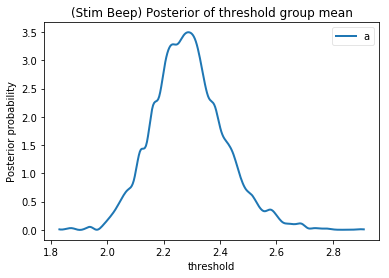

In [346]:
a = beep_stim.nodes_db.node['a']
hddm.analyze.plot_posterior_nodes([a])
plt.xlabel('threshold')
plt.ylabel('Posterior probability')
plt.title('(Stim Beep) Posterior of threshold group mean')
plt.show()

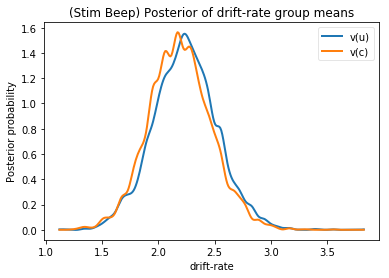

In [347]:
v_u, v_c = beep_stim.nodes_db.node[['v(u)', 'v(c)']]
hddm.analyze.plot_posterior_nodes([v_u, v_c])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('(Stim Beep) Posterior of drift-rate group means')
plt.show()

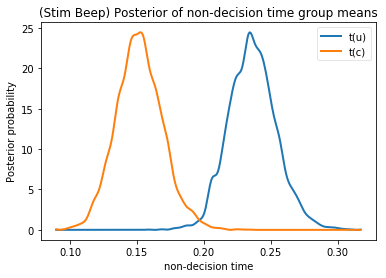

In [348]:
t_u, t_c = beep_stim.nodes_db.node[['t(u)', 't(c)']]
hddm.analyze.plot_posterior_nodes([t_u, t_c])
plt.xlabel('non-decision time')
plt.ylabel('Posterior probability')
plt.title('(Stim Beep) Posterior of non-decision time group means')
plt.show()

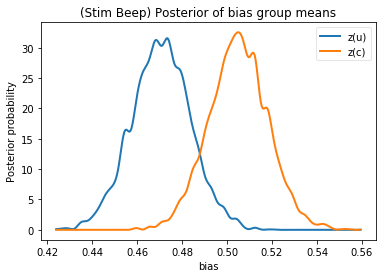

In [349]:
z_u, z_c = beep_stim.nodes_db.node[['z(u)', 'z(c)']]
hddm.analyze.plot_posterior_nodes([z_u, z_c])
plt.xlabel('bias')
plt.ylabel('Posterior probability')
plt.title('(Stim Beep) Posterior of bias group means')
plt.show()

## Posterior Predictive Check (Beep)

### Accuracy-coded beep

In [94]:
bppc = hddm.utils.post_pred_gen(beep_acc)

 [-------------------110%-------------------] 31 of 28 complete in 1335.7 sec

In [97]:
bppc_compare = hddm.utils.post_pred_stats(model_b, bppc)
print(bppc_compare)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.778135  0.795291  0.123737  0.000294  0.015605     True   
mean_ub   0.855433  0.821188  0.212542  0.001173  0.046347     True   
std_ub    0.665953  0.420464  0.162188  0.060265  0.086570     True   
10q_ub    0.389500  0.435782  0.094601  0.002142  0.011091     True   
30q_ub    0.537021  0.555186  0.127195  0.000330  0.016509     True   
50q_ub    0.665879  0.698644  0.172780  0.001074  0.030926     True   
70q_ub    0.849032  0.912208  0.248106  0.003991  0.065548     True   
90q_ub    1.449996  1.359244  0.414484  0.008236  0.180033     True   
mean_lb  -1.085988 -0.822176  0.232183  0.069597  0.123506     True   
std_lb    0.903215  0.389508  0.200447  0.263896  0.304074    False   
10q_lb    0.444976  0.465194  0.112444  0.000409  0.013052     True   
30q_lb    0.630831  0.576500  0.145448  0.002952  0.024107     True   
50q_lb

### Stim-coded Beep

In [108]:
bppc2 = hddm.utils.post_pred_gen(beep_stim)

 [------------------105%------------------] 59 of 56 complete in 3179.1 sec

In [109]:
bppc_compare2 = hddm.utils.post_pred_stats(stim_b, bppc2)
print(bppc_compare2)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.936003  0.932646  0.071991  0.000011  0.005194     True   
mean_ub   0.811824  0.850116  0.267236  0.001466  0.072882     True   
std_ub    0.705276  0.482211  0.240484  0.049758  0.107591     True   
10q_ub    0.364230  0.400436  0.098640  0.001311  0.011041     True   
30q_ub    0.491178  0.546768  0.144118  0.003090  0.023860     True   
50q_ub    0.613278  0.715256  0.212955  0.010399  0.055749     True   
70q_ub    0.787827  0.959066  0.323825  0.029323  0.134185     True   
90q_ub    1.393924  1.459930  0.569839  0.004357  0.329074     True   
mean_lb  -1.516434 -0.878211  0.420975  0.407328  0.584548     True   
std_lb    1.449590  0.314117  0.352153  1.289299  1.413310    False   
10q_lb    0.498767  0.597810  0.318249  0.009809  0.111092     True   
30q_lb    0.745144  0.695967  0.338326  0.002418  0.116883     True   
50q_lb

## Parameter Recovery (Beep)

### Accuracy-coded beep

In [140]:
bsyndata, bparam = hddm.generate.gen_rand_data(params={'u': {'a': 2.334434, 'v': 2.270080, 't': 0.225199},
                                                       'c': {'a': 2.334434, 'v': 2.208667, 't': 0.140507}}, 
                                               size = 100, subjs = 14)
print(bsyndata.loc[bsyndata['condition'] == 'u'].mean())
print(bsyndata.loc[bsyndata['condition'] == 'c'].mean())

rt          0.773129
response    0.993571
subj_idx    6.500000
dtype: float64
rt          0.719551
response    0.996429
subj_idx    6.500000
dtype: float64


In [339]:
bparamrec = hddm.HDDM(bsyndata, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition'})
bparamrec.sample(10000, burn=500)

 [-----------------100%-----------------] 10000 of 10000 complete in 802.2 sec

In [340]:
bparamrec.print_stats()

                    mean          std         2.5q          25q          50q          75q       97.5q       mc err
a                2.43205    0.0829788      2.28963      2.37476      2.42829      2.48306     2.60536   0.00410808
a_std           0.161019    0.0885915   0.00958103     0.101527     0.158327     0.214693     0.35308   0.00570012
a_subj.0         2.46351     0.136936      2.22858      2.36931      2.45113      2.54339     2.77352    0.0054951
a_subj.1         2.58547     0.172595      2.31474      2.45975      2.56448      2.69334     2.97457   0.00939222
a_subj.2          2.6195     0.190071       2.3175      2.47495      2.59958      2.73762     3.05111    0.0107563
a_subj.3         2.49838     0.144024      2.25851       2.3978      2.48545      2.58355     2.81995   0.00651172
a_subj.4         2.35377     0.114345      2.12544      2.27924      2.35292      2.43078     2.57754   0.00366104
a_subj.5         2.38919     0.109512      2.17182      2.31646      2.38665    

a: 6% diff

v(c): 5% diff

v(u): 4% diff

t(c): 31.3% diff

t(u): 15.1% diff

### Stim-coded beep

In [100]:
b1, b1param = hddm.generate.gen_rand_data(params={'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 0.471034},
                                                  'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 0.504701}}, 
                                               size = 50, subjs = 14)
b2, b2param = hddm.generate.gen_rand_data(params={'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 1 - 0.471034},
                                                  'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 1 - 0.504701}}, 
                                               size = 50, subjs = 14)
b1['stimCode'] = 1
b2['stimCode'] = 0
bsyndata2 = b1.append(b2, ignore_index = True)

In [101]:
bparamrec2 = hddm.HDDMStimCoding(bsyndata2, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimCode', split_param='v')
bparamrec2.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 791.8 sec

In [102]:
bparamrec2.print_stats()

                    mean         std        2.5q         25q          50q         75q      97.5q       mc err
a                2.01863   0.0625758     1.90189     1.97755       2.0166     2.05851    2.14756   0.00295302
a_std           0.157337   0.0531848   0.0717336    0.119558     0.151332    0.187616    0.27889   0.00155193
a_subj.0         2.05704    0.100784     1.87364     1.98782      2.05093     2.12176    2.26932   0.00347753
a_subj.1         2.18476    0.114656     1.98344     2.10366      2.17663     2.25624     2.4296   0.00402716
a_subj.2         1.94349   0.0941075     1.76316     1.87834      1.94234     2.00573    2.13407   0.00307496
a_subj.3         1.88085   0.0869149     1.71379     1.82176      1.87945        1.94     2.0511     0.002818
a_subj.4          2.1064    0.106392     1.91389     2.03385      2.10165     2.17232    2.33369   0.00353404
a_subj.5         2.11664    0.105022     1.92957     2.04449      2.10897     2.18216    2.33659   0.00351511
a_subj.6  

In [5]:
from pandas import Series
n_subjects = 14
trials_per_level = 50
level1a = {'v':1.3, 'a':2, 't':.3, 'z':.5}
level2a = {'v':1.4, 'a':2, 't':.3, 'z':.6}
level3a = {'v':1.5, 'a':2, 't':.3, 'z':.7}

data_a, params_a = hddm.generate.gen_rand_data({'level1': level1a,
                                                'level2': level2a,
                                                'level3': level3a},
                                                size=trials_per_level,
                                                subjs=n_subjects)
level1b = {'v':1.3, 'a':2, 't':.3, 'z':.5}
level2b = {'v':1.4, 'a':2, 't':.3, 'z':.4}
level3b = {'v':1.5, 'a':2, 't':.3, 'z':.3}
data_b, params_b = hddm.generate.gen_rand_data({'level1': level1b,
                                                'level2': level2b,
                                                'level3': level3b},
                                                size=trials_per_level,
                                                subjs=n_subjects)
data_a['stimulus'] = Series(np.ones((len(data_a))), index=data_a.index)
data_b['stimulus'] = Series(np.zeros((len(data_b))), index=data_a.index)
mydata = data_a.append(data_b, ignore_index=True)
print(mydata.tail())

            rt  response  subj_idx condition  stimulus
4195  0.959125       1.0        13    level3       0.0
4196  0.605125       0.0        13    level3       0.0
4197  1.425125       1.0        13    level3       0.0
4198  1.415125       1.0        13    level3       0.0
4199  0.858125       1.0        13    level3       0.0


In [6]:
test = hddm.HDDMStimCoding(mydata, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimulus', split_param='v')
test.sample(7000, burn=500)
test.print_stats()

 [-----------------100%-----------------] 7000 of 7000 complete in 1014.7 sec                       mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                  1.735099  0.034591  1.669136  1.712540  1.734541  1.756630  1.805960  0.000704
a_std              0.105221  0.032806  0.052787  0.082578  0.101118  0.123001  0.183786  0.000799
a_subj.0           1.687317  0.047074  1.594640  1.655560  1.686124  1.719159  1.780229  0.000727
a_subj.1           1.779277  0.051323  1.680783  1.744084  1.777253  1.813020  1.883912  0.000878
a_subj.2           1.688943  0.059005  1.575627  1.648499  1.688154  1.728081  1.807071  0.001185
a_subj.3           1.663106  0.047293  1.571940  1.630706  1.662972  1.695129  1.756716  0.000858
a_subj.4           1.789498  0.053781  1.688026  1.752106  1.788410  1.823505  1.903024  0.000913
a_subj.5           1.580311  0.051126  1.482390  1.545558  1.579759  1.613819  1.682306  0.001211
a_subj.6           1.755760  0.053762  1.

In [290]:
bsyndata2, bparam2 = hddm.generate.gen_rand_data(params={'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 0.471034},
                                                         'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 0.504701}}, 
                                               size = 100, subjs = 14)

In [39]:
n_subjects = 14
trials_per_level = 50 # and per stimulus
data_a, params_a = hddm.generate.gen_rand_data({'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 0.471034},
                                               'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 0.504701}},
                                                size=trials_per_level,
                                                subjs=n_subjects)
data_b, params_b = hddm.generate.gen_rand_data({'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 1 - 0.504701},
                                               'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 1 - 0.471034}},
                                                size=trials_per_level,
                                                subjs=n_subjects)
data_a['stimulus'] = Series(np.ones((len(data_a))), index=data_a.index)
data_b['stimulus'] = Series(np.ones((len(data_b)))*2, index=data_a.index)
bsyndata2 = data_a.append(data_b, ignore_index=True)
print(len(bsyndata2))

print(bsyndata2.loc[bsyndata2['condition'] == 'u'][['rt', 'response']].mean())
print(bsyndata2.loc[bsyndata2['condition'] == 'c'][['rt', 'response']].mean())

2800
rt          0.796890
response    0.987857
dtype: float64
rt          0.728930
response    0.987143
dtype: float64


In [40]:
bsyndata2.head()

,rt,response,subj_idx,condition,stimulus
0,0.872583,1.0,0,c,1.0
1,0.828583,1.0,0,c,1.0
2,0.620583,1.0,0,c,1.0
3,0.784583,1.0,0,c,1.0
4,0.739583,1.0,0,c,1.0


In [41]:
bparamrec2 = hddm.HDDMStimCoding(bsyndata2, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimulus', split_param='v')
bparamrec2.sample(7000, burn=500)
bparamrec2.print_stats()

 [-----------------100%-----------------] 7000 of 7000 complete in 664.0 sec                  mean       std      2.5q       25q       50q       75q     97.5q    mc err
a             1.967613  0.045038  1.885560  1.934816  1.965006  2.001579  2.052436  0.003046
a_std         0.054620  0.040874  0.001475  0.021036  0.048008  0.080827  0.148575  0.002847
a_subj.0      1.937895  0.071286  1.780540  1.896654  1.942389  1.990831  2.058896  0.004013
a_subj.1      1.965138  0.063798  1.836310  1.926734  1.963695  2.006130  2.089233  0.003260
a_subj.2      1.936612  0.069494  1.782227  1.895301  1.941566  1.988284  2.057024  0.003922
a_subj.3      1.932586  0.072053  1.771427  1.889944  1.937568  1.986018  2.053674  0.004094
a_subj.4      1.981179  0.060677  1.870362  1.939188  1.979911  2.017789  2.111281  0.002885
a_subj.5      1.968534  0.065285  1.835222  1.928226  1.965710  2.008579  2.100547  0.003163
a_subj.6      2.014297  0.076408  1.896659  1.956897  2.004569  2.055014  2.198130  0.0

In [390]:
from pandas import Series
n_subjects = 14
trials_per_level = 50 # and per stimulus
data_a, params_a = hddm.generate.gen_rand_data({'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 0.471034},
                                                'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 0.504701}},
                                                size=trials_per_level,
                                                subjs=n_subjects)
data_b, params_b = hddm.generate.gen_rand_data({'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 0.529066},
                                                'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 0.495299}},
                                                size=trials_per_level,
                                                subjs=n_subjects)
data_a['stimulus'] = Series(np.ones((len(data_a)))*0, index=data_a.index)
data_b['stimulus'] = Series(np.ones((len(data_b))), index=data_a.index)
bsyndata2 = data_a.append(data_b, ignore_index=True)
print(len(bsyndata2))

print(bsyndata2.loc[bsyndata2['condition'] == 'u'][['rt', 'response']].mean())
print(bsyndata2.loc[bsyndata2['condition'] == 'c'][['rt', 'response']].mean())

2800
rt          0.761740
response    0.993571
dtype: float64
rt          0.688320
response    0.992857
dtype: float64


In [429]:
from pandas import Series
n_subjects = 14
trials_per_level = 50 # and per stimulus
data_b, params_b = hddm.generate.gen_rand_data({'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 0.471034}},
                                                size=trials_per_level,
                                                subjs=n_subjects)
data_bc, params_bc = hddm.generate.gen_rand_data({'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 0.504701}},
                                                  size=trials_per_level,
                                                  subjs=n_subjects)
data_a, params_a = hddm.generate.gen_rand_data({'u': {'a': 2.290058, 'v': 2.242900, 't': 0.235728, 'z': 0.529066}},
                                                size=trials_per_level,
                                                subjs=n_subjects)
data_ac, params_ac = hddm.generate.gen_rand_data({'c': {'a': 2.290058, 'v': 2.196467, 't': 0.152843, 'z': 0.495299}},
                                                  size=trials_per_level,
                                                  subjs=n_subjects)
data_a['stimulus'] = Series(np.ones(len(data_a)), index = data_a.index)
data_ac['stimulus'] = Series(np.ones(len(data_ac)), index = data_ac.index)
data_b['stimulus'] = Series(np.zeros((len(data_b))), index=data_b.index)
data_bc['stimulus'] = Series(np.zeros((len(data_b))), index=data_bc.index)
bsyndata2 = data_a.append([data_ac, data_b, data_bc], ignore_index = True)
print(bsyndata2.loc[bsyndata2['condition'] == 'u'][['rt', 'response']].mean())
print(bsyndata2.loc[bsyndata2['condition'] == 'c'][['rt', 'response']].mean())

rt          0.730870
response    0.984286
dtype: float64
rt          0.708549
response    0.987143
dtype: float64


In [400]:
print(stim_b.loc[stim_b['trialtype'] == 'u'][['rt', 'acc']].mean())
print(stim_b.loc[stim_b['trialtype'] == 'c'][['rt', 'acc']].mean())

rt     0.881617
acc    0.932857
dtype: float64
rt     0.861380
acc    0.938571
dtype: float64


In [430]:
bparamrec2 = hddm.HDDMStimCoding(bsyndata2, include=['z', 'p_outlier'], depends_on={'v': 'condition', 't': 'condition', 'z': 'condition'}, stim_col='stimulus', split_param='v')
bparamrec2.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 669.7 sec

In [431]:
# changed stimulus col values
bparamrec2.print_stats()

                  mean       std      2.5q       25q       50q       75q     97.5q    mc err
a             1.918889  0.058289  1.809329  1.879047  1.917620  1.957634  2.035984  0.002779
a_std         0.112995  0.051936  0.021183  0.078258  0.109206  0.143744  0.227217  0.002652
a_subj.0      1.910543  0.102226  1.709277  1.845976  1.908383  1.975926  2.120262  0.005240
a_subj.1      1.908083  0.075751  1.761388  1.857066  1.907121  1.958008  2.060138  0.002290
a_subj.2      1.908426  0.086215  1.742457  1.851839  1.906695  1.964585  2.080184  0.002891
a_subj.3      1.990605  0.095203  1.825758  1.925386  1.982486  2.047365  2.194158  0.003743
a_subj.4      1.869841  0.091460  1.692282  1.808246  1.871850  1.928888  2.052273  0.003571
a_subj.5      1.827884  0.094644  1.643180  1.761048  1.829503  1.894076  2.010886  0.004132
a_subj.6      1.944541  0.094703  1.771006  1.882140  1.938142  2.002136  2.144222  0.003481
a_subj.7      1.893704  0.074709  1.745757  1.844070  1.893360  1.9444

In [377]:
#flipped zs
bparamrec2.print_stats()

                  mean       std      2.5q       25q       50q       75q     97.5q    mc err
a             1.971003  0.056574  1.870131  1.930806  1.966965  2.007862  2.092463  0.004120
a_std         0.071588  0.043907  0.007989  0.038360  0.066313  0.097718  0.171581  0.002560
a_subj.0      1.990401  0.082885  1.843039  1.932243  1.984154  2.040477  2.177404  0.004648
a_subj.1      2.019223  0.088512  1.875108  1.953722  2.011114  2.073517  2.220378  0.005186
a_subj.2      1.934579  0.080928  1.769308  1.886019  1.934395  1.987161  2.093554  0.004228
a_subj.3      1.972655  0.082126  1.818662  1.917737  1.967289  2.023792  2.149434  0.004657
a_subj.4      1.991783  0.076764  1.859070  1.935279  1.986827  2.039029  2.155930  0.004228
a_subj.5      1.989158  0.080371  1.846913  1.932499  1.982138  2.038221  2.168310  0.004522
a_subj.6      1.968627  0.072155  1.836920  1.919107  1.964664  2.013758  2.122232  0.003871
a_subj.7      1.996741  0.080873  1.855432  1.938399  1.989973  2.0463

In [361]:
bparamrec2.print_stats()

                  mean       std      2.5q       25q       50q       75q     97.5q    mc err
a             1.981615  0.060355  1.876202  1.936950  1.977927  2.022517  2.106869  0.004839
a_std         0.053651  0.036044  0.005543  0.027898  0.046194  0.071609  0.144257  0.002132
a_subj.0      1.954020  0.081620  1.783794  1.902472  1.956555  2.005417  2.111340  0.004966
a_subj.1      1.961614  0.078988  1.802984  1.909826  1.960958  2.013671  2.113539  0.005042
a_subj.2      2.010776  0.079829  1.874448  1.955110  2.003752  2.060781  2.184771  0.005237
a_subj.3      2.006032  0.080278  1.868864  1.950418  1.997034  2.054811  2.180750  0.005175
a_subj.4      1.985203  0.073215  1.850644  1.935304  1.981483  2.031173  2.138620  0.004658
a_subj.5      1.996420  0.081203  1.851227  1.940907  1.989158  2.047908  2.167173  0.005285
a_subj.6      1.969878  0.076316  1.824088  1.918749  1.967322  2.017795  2.121746  0.004802
a_subj.7      1.996375  0.077813  1.858308  1.943784  1.990834  2.0451

In [121]:
bparamrec2.print_stats()

                  mean       std      2.5q       25q       50q       75q     97.5q    mc err
a             1.651596  0.030949  1.593325  1.631356  1.650774  1.670212  1.716610  0.000732
a_std         0.086685  0.031973  0.032919  0.064426  0.083430  0.104622  0.160045  0.001215
a_subj.0      1.763330  0.061096  1.650680  1.720465  1.761140  1.804304  1.888339  0.001935
a_subj.1      1.622890  0.050564  1.523464  1.588981  1.623053  1.655976  1.722074  0.001067
a_subj.2      1.654482  0.050546  1.557055  1.620207  1.654456  1.686770  1.759208  0.001002
a_subj.3      1.660398  0.054061  1.557615  1.624040  1.658283  1.694486  1.771280  0.001074
a_subj.4      1.692213  0.054955  1.589808  1.654915  1.688961  1.727323  1.806888  0.001183
a_subj.5      1.701424  0.055796  1.602372  1.661902  1.697895  1.737064  1.816873  0.001273
a_subj.6      1.653636  0.053626  1.551204  1.618404  1.652074  1.686922  1.764215  0.000985
a_subj.7      1.671969  0.053966  1.573014  1.634391  1.669278  1.7072

a: 2.1% diff

v(c): 5.6% diff

v(u): 5.7% diff

t(c): 13% diff

t(u): 0.1% diff

z(c): 0.2% diff

z(u): 11.2% diff

# Old models

## Vary by unisensory/congruent and 2/3 flashes

In [79]:
flash_acc2 = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type', 'stimName'], 't': ['type', 'stimName']})
flash_acc2.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 637.8 sec

In [80]:
flash_acc2.print_stats()

                         mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                    1.703131  0.094190  1.530280  1.639464  1.697672  1.761284  1.901385  0.001469
a_std                0.332672  0.083625  0.210828  0.274489  0.318305  0.375153  0.528948  0.001774
a_subj.1.0           2.126073  0.111639  1.921076  2.047733  2.119805  2.197454  2.366489  0.002548
a_subj.2.0           1.929853  0.083002  1.773527  1.872145  1.926948  1.984221  2.102571  0.001499
a_subj.3.0           1.370059  0.080798  1.217519  1.313481  1.367761  1.423700  1.535422  0.002702
a_subj.4.0           1.762512  0.076686  1.618694  1.710062  1.759930  1.812207  1.921942  0.001561
a_subj.5.0           2.014737  0.100214  1.826708  1.946206  2.011284  2.079095  2.220786  0.002287
a_subj.6.0           1.897676  0.090718  1.726116  1.833759  1.895433  1.957566  2.081776  0.002217
a_subj.7.0           1.797476  0.076027  1.651538  1.745684  1.796250  1.846571  1.949046  0.001456


In [90]:
fppc2 = hddm.utils.post_pred_gen(flash_acc2)

 [------------------105%------------------] 59 of 56 complete in 2396.0 sec

In [93]:
fppc_compare2 = hddm.utils.post_pred_stats(model_f, fppc2)
print(fppc_compare2)

          observed      mean       std           SEM       MSE credible  \
stat                                                                      
accuracy  0.778135  0.785527  0.226781  5.464787e-05  0.051484     True   
mean_ub   0.855433  0.824403  0.255163  9.629046e-04  0.066071     True   
std_ub    0.665953  0.400850  0.206955  7.027969e-02  0.113110     True   
10q_ub    0.389500  0.454602  0.121276  4.238339e-03  0.018946     True   
30q_ub    0.537021  0.571205  0.157151  1.168506e-03  0.025865     True   
50q_ub    0.665879  0.709956  0.212699  1.942770e-03  0.047184     True   
70q_ub    0.849032  0.913406  0.304318  4.144056e-03  0.096754     True   
90q_ub    1.449996  1.326561  0.502026  1.523606e-02  0.267267     True   
mean_lb  -1.085988 -0.842109  0.300749  5.947689e-02  0.149927     True   
std_lb    0.903215  0.342147  0.269634  3.147972e-01  0.387500     True   
10q_lb    0.444976  0.530092  0.199483  7.244650e-03  0.047038     True   
30q_lb    0.630831  0.630

In [25]:
beep_acc2 = hddm.HDDM(model_b, include=['a', 'v', 't', 'p_outlier'], depends_on={'v': ['type', 'stimName'], 't': ['type', 'stimName']})
beep_acc2.sample(7000, burn=500)

 [-----------------100%-----------------] 7001 of 7000 complete in 683.9 sec

In [26]:
beep_acc2.print_stats()

                         mean       std      2.5q       25q       50q       75q     97.5q    mc err
a                    2.200595  0.112022  1.995613  2.124570  2.194940  2.269042  2.445599  0.004953
a_std                0.319009  0.093885  0.173661  0.254210  0.305648  0.369765  0.544017  0.003129
a_subj.1.0           2.768557  0.188990  2.422729  2.636831  2.759288  2.891783  3.157849  0.007411
a_subj.2.0           2.054795  0.105359  1.864433  1.980444  2.051144  2.123073  2.274486  0.003036
a_subj.3.0           1.912661  0.176501  1.618852  1.787960  1.893891  2.017807  2.307200  0.008070
a_subj.4.0           2.050665  0.085349  1.888219  1.992570  2.048839  2.105857  2.227876  0.002016
a_subj.5.0           2.351929  0.096149  2.170049  2.285556  2.349899  2.415424  2.549821  0.002015
a_subj.6.0           2.492803  0.221884  2.088632  2.338092  2.478854  2.635888  2.949100  0.011300
a_subj.7.0           2.344883  0.151087  2.073811  2.240539  2.336642  2.440902  2.666535  0.005262


In [27]:
bppc2 = hddm.utils.post_pred_gen(beep_acc2)

 [------------------105%------------------] 59 of 56 complete in 2853.8 sec

In [29]:
bppc_compare2 = hddm.utils.post_pred_stats(model_b, bppc2)
print(bppc_compare2)

          observed      mean       std       SEM       MSE credible  \
stat                                                                  
accuracy  0.936003  0.958033  0.098906  0.000485  0.010268     True   
mean_ub   0.811824  0.747368  0.257363  0.004155  0.070390     True   
std_ub    0.705276  0.354193  0.215075  0.123259  0.169517     True   
10q_ub    0.364230  0.409418  0.100310  0.002042  0.012104     True   
30q_ub    0.491178  0.525384  0.142563  0.001170  0.021494     True   
50q_ub    0.613278  0.653432  0.203826  0.001612  0.043157     True   
70q_ub    0.787827  0.833393  0.303793  0.002076  0.094366     True   
90q_ub    1.393924  1.197600  0.526981  0.038543  0.316252     True   
mean_lb  -1.516434 -0.882663  0.422287  0.401666  0.579992     True   
std_lb    1.449590  0.273431  0.354659  1.383349  1.509132    False   
10q_lb    0.498767  0.637923  0.314918  0.019364  0.118538     True   
30q_lb    0.745144  0.722800  0.329991  0.000499  0.109393     True   
50q_lb

## Vary by unisensory/congruent and 2/3 flashes, add back bound sep

In [14]:
flash_acc3 = hddm.HDDM(model_f, include=['a', 'v', 't', 'p_outlier'], depends_on={'a': ['type', 'stimName'], 'v': ['type', 'stimName'], 't': ['type', 'stimName']})
flash_acc3.sample(7000, burn=500)

 [-----------------100%-----------------] 7000 of 7000 complete in 724.6 sec

In [15]:
flash_acc3.print_stats()

                         mean       std      2.5q       25q       50q       75q     97.5q    mc err
a(F2.u)              1.811840  0.111500  1.592404  1.738819  1.811359  1.884319  2.036660  0.002694
a(F2B2.c)            2.047023  0.133524  1.795251  1.955991  2.044066  2.136802  2.317286  0.004606
a(F3.u)              1.571487  0.098330  1.381276  1.505106  1.571307  1.635536  1.766772  0.001651
a(F3B3.c)            1.817476  0.114147  1.595926  1.740297  1.817382  1.891872  2.049284  0.002872
a_std                0.363458  0.053674  0.271009  0.325430  0.359145  0.396405  0.481025  0.001880
a_subj(F2.u).1.0     2.125704  0.269858  1.697706  1.939081  2.091427  2.273391  2.754127  0.008309
a_subj(F2.u).2.0     1.588058  0.140934  1.330326  1.488942  1.580923  1.679989  1.885886  0.003216
a_subj(F2.u).3.0     1.993313  0.296428  1.482574  1.783737  1.966249  2.174361  2.642914  0.011429
a_subj(F2.u).4.0     1.899771  0.202962  1.543799  1.757544  1.885581  2.026179  2.341874  0.005158
